In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from models import *
from data_split import *

## Data Loading

In [2]:
data = pickle.load(open(r'../Data/deltaQ_cycles_v3.pkl', 'rb'))
# data2 = pickle.load(open(r'../Data/temp_features.pkl', 'rb'))

In [3]:
n_cycles = 98
cut_start = 1

features = [
    "DeltaQ_logVars",
    # "DeltaQ_mins",
    # "DeltaQ_means",
    "DeltaT_max",
    # "DeltaT_var",
]

n_cycles = n_cycles - cut_start
y = np.zeros(124)
x = np.zeros((124, n_cycles*len(features)))

for i, cell in enumerate(data.keys()):
    for j, feature in enumerate(features):
        x[i, j*n_cycles:(j+1)*n_cycles] = data[cell][feature][cut_start:]
    y[i] = np.log10(data[cell]["cycle_life"])

# convert to tensors and concatenate features and labels
x = torch.Tensor(x)
y = torch.Tensor(y)

## Autoencoder multi-stage training


Stage 1:

Epoch 200/2000, 	decoding loss: 93.86,  	prediction loss: 257.25,  	reg_loss: 15.52
Epoch 400/2000, 	decoding loss: 77.79,  	prediction loss: 136.69,  	reg_loss: 14.86
Epoch 600/2000, 	decoding loss: 60.28,  	prediction loss: 100.50,  	reg_loss: 14.24
Epoch 800/2000, 	decoding loss: 42.71,  	prediction loss: 81.10,  	reg_loss: 13.69
Epoch 1000/2000, 	decoding loss: 27.55,  	prediction loss: 68.86,  	reg_loss: 13.16
Epoch 1200/2000, 	decoding loss: 15.42,  	prediction loss: 59.52,  	reg_loss: 12.66
Epoch 1400/2000, 	decoding loss: 7.55,  	prediction loss: 52.00,  	reg_loss: 12.16
Epoch 1600/2000, 	decoding loss: 4.28,  	prediction loss: 45.89,  	reg_loss: 11.68
Epoch 1800/2000, 	decoding loss: 2.99,  	prediction loss: 41.04,  	reg_loss: 11.21
Epoch 2000/2000, 	decoding loss: 2.43,  	prediction loss: 37.01,  	reg_loss: 10.78

train 	 60.81792
test 	 103.3617
sec 	 331.12558


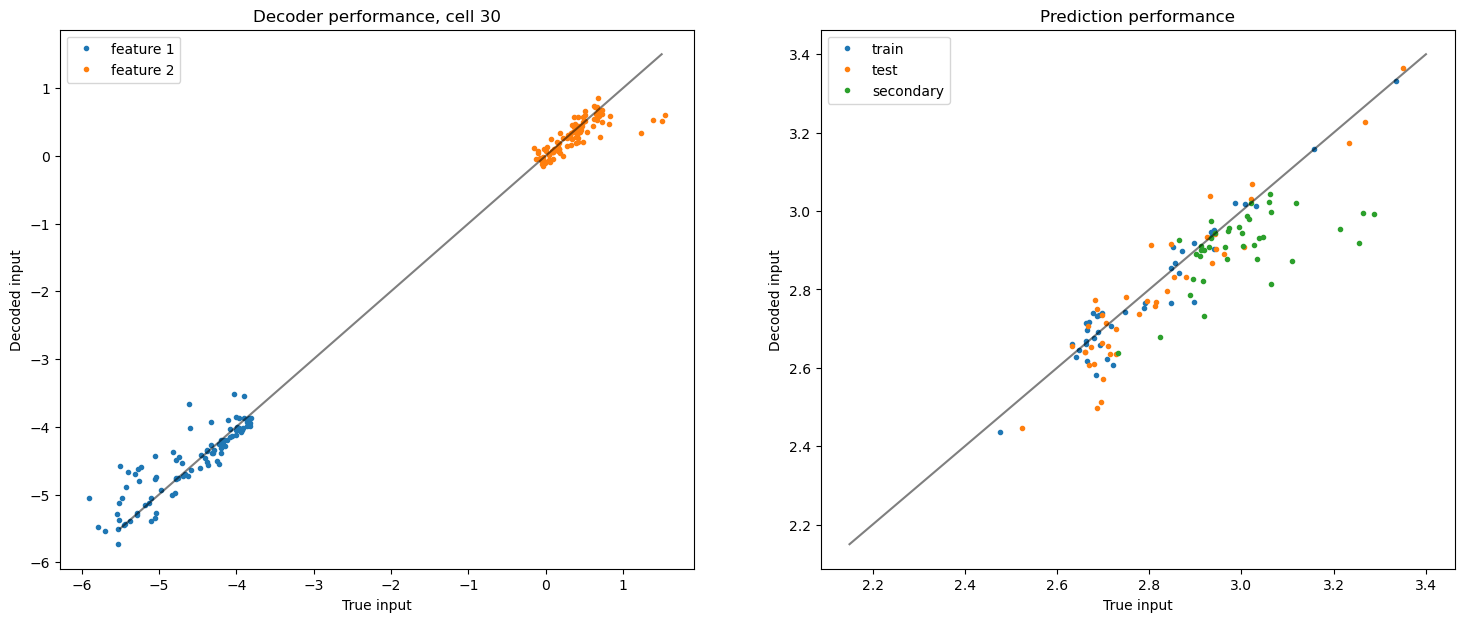


Stage 2:

Epoch 60/600, 	decoding loss: 0.23,  	prediction loss: 35.89,  	reg_loss: 1.07
Epoch 120/600, 	decoding loss: 0.23,  	prediction loss: 34.65,  	reg_loss: 1.07
Epoch 180/600, 	decoding loss: 0.22,  	prediction loss: 33.14,  	reg_loss: 1.07
Epoch 240/600, 	decoding loss: 0.22,  	prediction loss: 31.88,  	reg_loss: 1.07
Epoch 300/600, 	decoding loss: 0.21,  	prediction loss: 30.64,  	reg_loss: 1.07
Epoch 360/600, 	decoding loss: 0.21,  	prediction loss: 29.43,  	reg_loss: 1.06
Epoch 420/600, 	decoding loss: 0.21,  	prediction loss: 28.33,  	reg_loss: 1.06
Epoch 480/600, 	decoding loss: 0.21,  	prediction loss: 27.29,  	reg_loss: 1.06
Epoch 540/600, 	decoding loss: 0.20,  	prediction loss: 26.28,  	reg_loss: 1.06
Epoch 600/600, 	decoding loss: 0.20,  	prediction loss: 25.26,  	reg_loss: 1.06

train 	 50.236942
test 	 110.15449
sec 	 354.54526


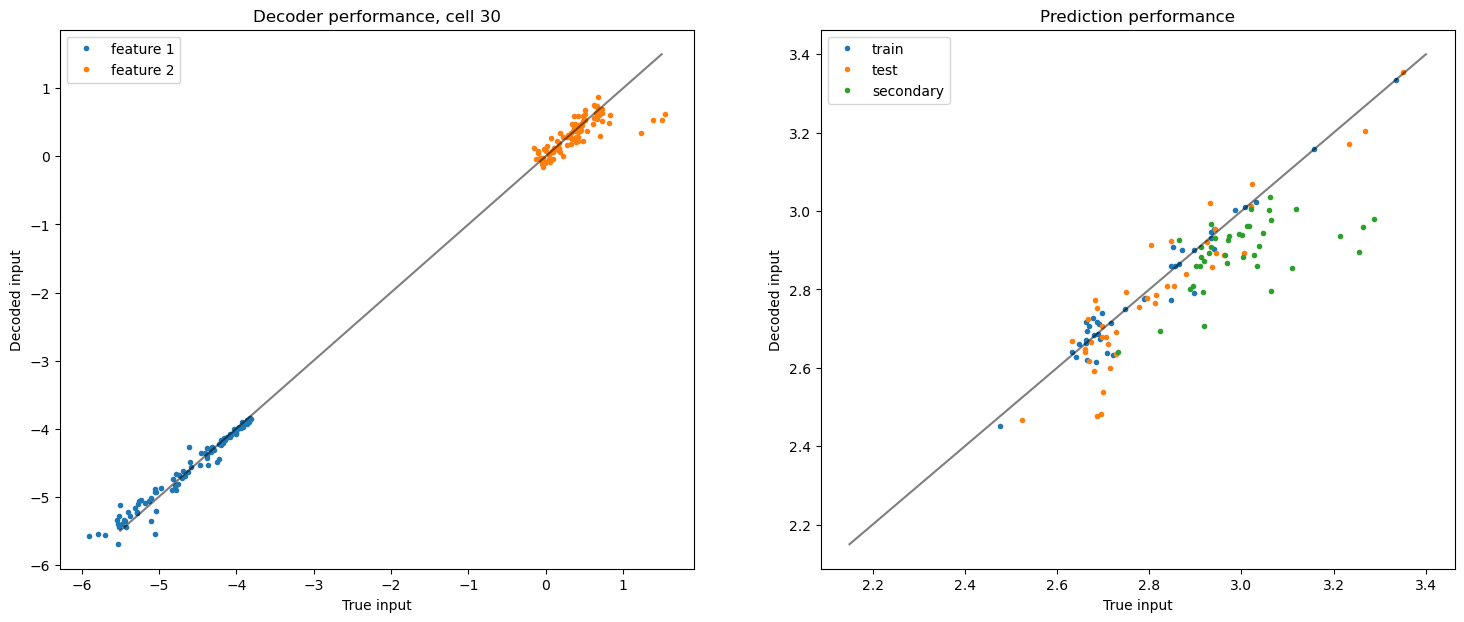

In [4]:
# del model

train_policy = {
    "num_stages": 2,
    "epochs": [2000, 600],
    "learning_rates": [3e-5, 1e-5],
    "batch_sizes": [64, 64],
    "prediction_weights": [0.01, 0.01],
    "decoding_weights": [10, 1],
    "en_weights": [0.1, 0.1]
}


model = AutoEncoder_ElasticNet(n_features=len(features), n_cycles=n_cycles)
# model.fit(train_dataset, decoding_weight=10)
# model.fit(train_dataset, prediction_weight=0.0001, decoding_weight=1, lr = 1e-5, epochs=1000)
model.fit(x, y, train_policy)

## Decoder performance on other cells

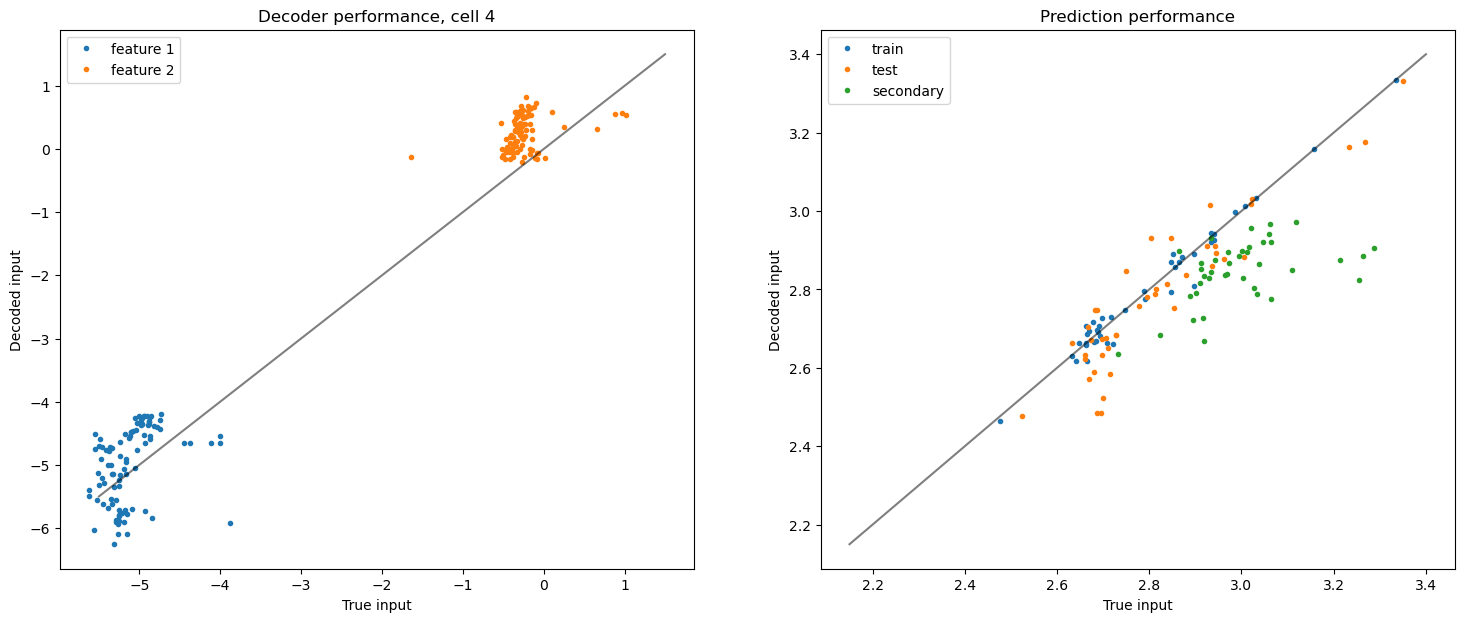

In [15]:
model.plotter(x, y, 4)

In [68]:
np.argmin(y)

tensor(42)